In [2]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Carregando os dados
df = pd.read_csv('dados/sales_data_sample.csv', encoding='windows-1252')
#Visualização inicial
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [6]:
#Limpeza e conversões
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['Total'] = df['QUANTITYORDERED'] * df['PRICEEACH']
month_map = {
    1: 'janeiro',
    2: 'fevereiro',
    3: 'março',
    4: 'abril',
    5: 'maio',
    6: 'junho',
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}
df['Mês'] = df['MONTH_ID'].map(month_map)
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...           CITY  STATE  \
0 2003-02-24  Shipped       1         2     2003  ...            NYC     NY   
1 2003-05-07  Shipped       2         5     2003  ...          Reims    NaN   
2 2003-07-01  Shipped       3         7     2003  ...          Paris    NaN   
3 2003-08-25  Shipped       3         8     2003  ...       Pasadena     CA   
4 2003-10-10  Shipped       4        10     2003  ...  San Francisco     CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  \
0      10022    

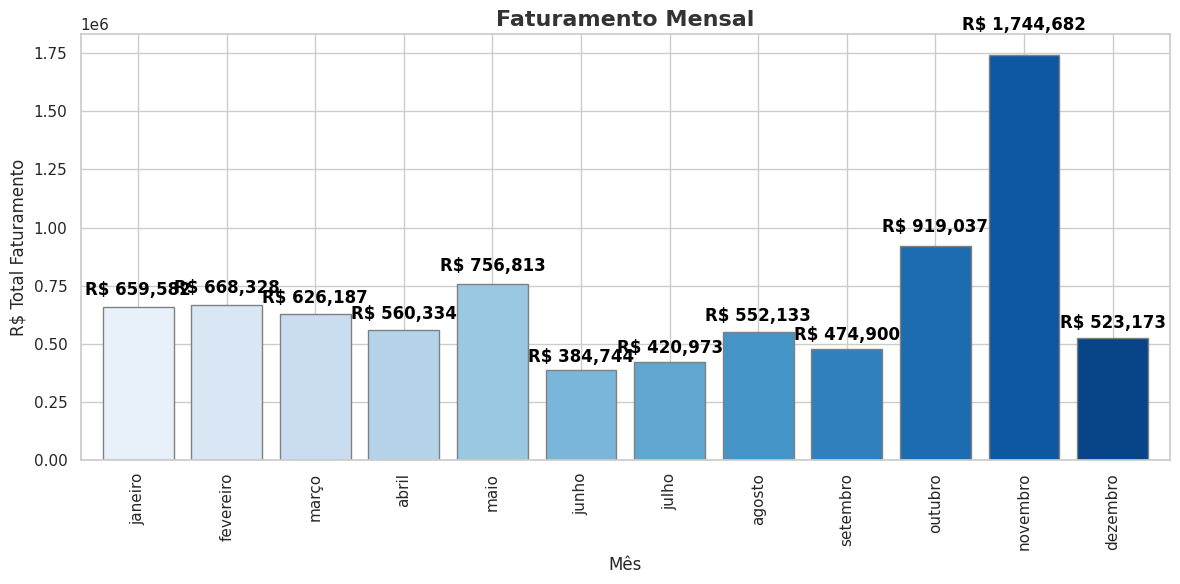

In [8]:
#Análise de vendas por mês
faturamento_mensal = df.groupby('Mês')['Total'].sum()
ordem_meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho',
               'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

faturamento_mensal = faturamento_mensal.reindex(ordem_meses)

#Plotar gráfico
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,6))  # Tamanho maior para visualização

# Usando o método plot com barra e cores mais sofisticadas
faturamento_mensal.plot(kind='bar',
                        color=sns.color_palette("Blues", len(faturamento_mensal)),
                        edgecolor='gray',  # Borda cinza para dar um acabamento
                        width=0.8)  # Deixar as barras um pouco mais estreitas para dar um visual mais suave

# Adicionar rótulos nas barras
for index, value in enumerate(faturamento_mensal):
    # Calculando um pequeno deslocamento baseado no valor da barra, para evitar sobreposição
    y_offset = value * 0.05  # Ajuste o valor de 0.05 para aumentar ou diminuir o espaço entre o valor e a barra
    plt.text(index, value + y_offset, f'R$ {value:,.0f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Títulos e rótulos com formatação mais profissional
plt.title('Faturamento Mensal', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('R$ Total Faturamento', fontsize=12)

# Melhorando o layout (remover bordas extras e ajustar espaçamento)
plt.tight_layout()

# Salvando o gráfico
plt.savefig('imagens/vendas_mensais.png', dpi=300)

# Exibindo o gráfico
plt.show()


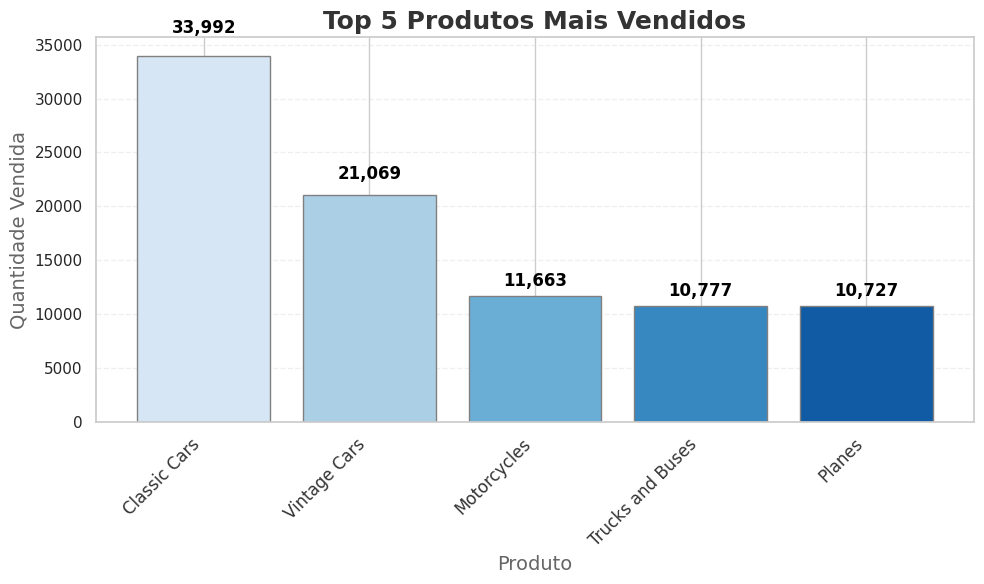

In [9]:
#Produtos mais vendidos
top_produtos = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(5)

#Plotar gráfico

sns.set_theme(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10,6))  # Tamanho do gráfico para boa visualização

# Gráfico de barras
top_produtos.plot(kind='bar',
                  color=sns.color_palette("Blues", len(top_produtos)),  # Usando uma paleta de azuis suaves
                  edgecolor='gray',  # Borda das barras para acabamento
                  width=0.8)  # Largura das barras

# Adicionando rótulos nas barras
for index, value in enumerate(top_produtos):
    plt.text(index, value + 0.05 * value, f'{value:,.0f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Título e rótulos
plt.title('Top 5 Produtos Mais Vendidos', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Produto', fontsize=14, color='#666666')
plt.ylabel('Quantidade Vendida', fontsize=14, color='#666666')

# Melhorando o layout (ajustando para não cortar elementos)
plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')

# Exibindo a grid apenas no eixo Y para dar destaque às barras
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ajustando o layout para garantir boa distribuição
plt.tight_layout()

# Salvando o gráfico em alta resolução
plt.savefig('imagens/top_produtos_vendidos.png', dpi=300)

# Exibindo o gráfico
plt.show()


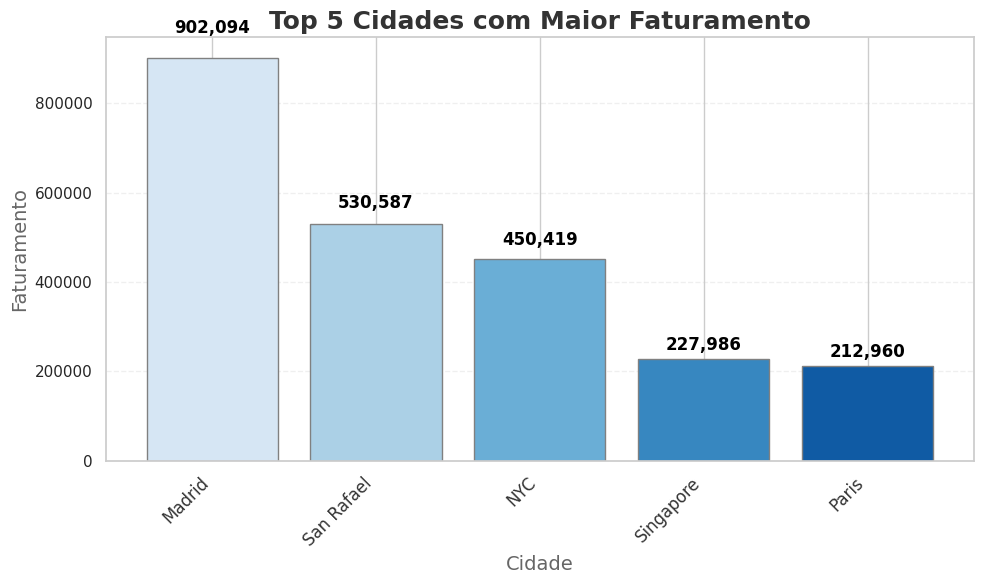

In [11]:
#Faturamento por cidade
top_cidades = df.groupby('CITY')['Total'].sum().sort_values(ascending=False).head(5)

#Plotar gráfico

sns.set_theme(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10,6))  # Tamanho do gráfico para boa visualização

# Gráfico de barras
top_cidades.plot(kind='bar',
                  color=sns.color_palette("Blues", len(top_produtos)),  # Usando uma paleta de azuis suaves
                  edgecolor='gray',  # Borda das barras para acabamento
                  width=0.8)  # Largura das barras

# Adicionando rótulos nas barras
for index, value in enumerate(top_cidades):
    plt.text(index, value + 0.05 * value, f'{value:,.0f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Título e rótulos
plt.title('Top 5 Cidades com Maior Faturamento', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Cidade', fontsize=14, color='#666666')
plt.ylabel('Faturamento', fontsize=14, color='#666666')

# Melhorando o layout (ajustando para não cortar elementos)
plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')

# Exibindo a grid apenas no eixo Y para dar destaque às barras
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ajustando o layout para garantir boa distribuição
plt.tight_layout()

# Salvando o gráfico em alta resolução
plt.savefig('imagens/top_cidades.png', dpi=300)

# Exibindo o gráfico
plt.show()

In [12]:
#Gerando relatório em html

# Lista de caminhos das imagens salvas
imagens = [
    'imagens/vendas_mensais.png',
    'imagens/top_produtos_vendidos.png',
    'imagens/top_cidades.png'
]

# Criando o html
html = """
<html>
<head>
    <title>Relatório de Gráficos</title>
    <style>
        body { font-family: Arial, sans-serif; padding: 20px; }
        h1 { color: #333333; }
        h2 { margin-top: 40px; color: #444444; }
        img { margin-bottom: 30px; border: 1px solid #ccc; box-shadow: 2px 2px 5px rgba(0,0,0,0.1); }
    </style>
</head>
<body>
<h1>Relatório de Gráficos</h1>
"""

# Adicionando imagens no html
for img_path in imagens:
    titulo = img_path.split("/")[-1].replace("_", " ").replace(".png", "").title()
    html += f'<h2>{titulo}</h2>'
    html += f'<img src="{img_path}" width="800"><br>'

html += "</body></html>"

# Salvando o html
with open("relatorio_graficos.html", "w", encoding="utf-8") as f:
    f.write(html)


In [13]:
from IPython.display import IFrame

IFrame("relatorio_graficos.html", width=1000, height=600)
